In [10]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import preprocessing
%matplotlib inline

In [11]:
d = pd.read_csv('/content/Video_Store.csv')

In [12]:
d.head()

,ID,Gender,Income,Age,Rentals,AvgPerVisit,Genre
0,1,M,45000,25,27,2.5,Action
1,2,F,54000,33,12,3.4,Drama
2,3,F,32000,20,42,1.6,Comedy
3,4,F,59000,70,16,4.2,Drama
4,5,M,37000,35,25,3.2,Action


In [13]:
d.shape

(40, 7)

In [14]:
d.isnull().sum()

ID             0
Gender         0
Income         0
Age            0
Rentals        0
AvgPerVisit    0
Genre          0
dtype: int64

In [15]:
d.columns

Index(['ID', 'Gender', 'Income', 'Age', 'Rentals', 'AvgPerVisit', 'Genre'], dtype='object')

In [16]:
dX=d.drop(['Rentals'],axis=1)

In [17]:
dX=d.drop(['Gender'],axis=1)

In [18]:
dX=dX.drop(['Genre'],axis=1)

In [19]:
dX

,ID,Income,Age,Rentals,AvgPerVisit
0,1,45000,25,27,2.5
1,2,54000,33,12,3.4
2,3,32000,20,42,1.6
3,4,59000,70,16,4.2
4,5,37000,35,25,3.2
5,6,18000,20,33,1.7
6,7,29000,45,19,3.8
7,8,74000,25,31,2.4
8,9,38000,21,18,2.1
9,10,65000,40,21,3.3


In [20]:
d['Rentals'].value_counts()

19    3
21    2
32    2
28    2
16    2
25    2
12    2
22    2
30    1
40    1
27    1
37    1
23    1
17    1
15    1
43    1
34    1
11    1
26    1
41    1
39    1
36    1
24    1
14    1
29    1
48    1
18    1
31    1
33    1
42    1
20    1
Name: Rentals, dtype: int64

In [21]:
y= d['Rentals']
y

0     27
1     12
2     42
3     16
4     25
5     33
6     19
7     31
8     18
9     21
10    48
11    29
12    14
13    24
14    36
15    26
16    28
17    39
18    41
19    23
20    11
21    16
22    30
23    22
24    25
25    40
26    32
27    22
28    37
29    17
30    15
31    21
32    28
33    19
34    43
35    34
36    12
37    20
38    19
39    32
Name: Rentals, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


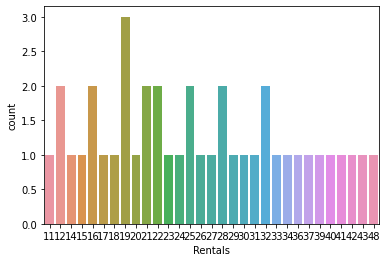

In [22]:
import seaborn
seaborn.countplot(d['Rentals'])

In [23]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
test = SelectKBest(score_func= f_classif, k=4)
test.fit(dX,y)
pd.DataFrame(test.scores_)

/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in true_divide
  f = msb / msw


,0
0,0.487814
1,1.112519
2,0.833400
3,inf
4,0.783992


In [28]:
X=dX[['ID',  'Income', 'Age', 'Rentals', 'AvgPerVisit']]

In [25]:
#Import knearest neighbors Classifier model
from sklearn.neighbors import KNeighborsClassifier

#Create KNN Classifier
knn = KNeighborsClassifier(n_neighbors=31)

In [29]:
knn.fit(X, y)

KNeighborsClassifier(n_neighbors=31)

In [30]:
pred=knn.predict(X)
pred

array([19, 19, 16, 19, 16, 16, 16, 19, 16, 19, 19, 16, 19, 19, 19, 16, 16,
       16, 16, 16, 19, 16, 16, 19, 16, 19, 19, 19, 16, 19, 19, 19, 16, 16,
       19, 16, 19, 19, 19, 16])

In [31]:
knn.predict(X).shape

(40,)

In [32]:
knn.score(X,y)

0.05

In [33]:
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.metrics import classification_report

In [34]:
accuracy_score(y,pred)

0.05

In [35]:
confusion_matrix(y,pred)

array([[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0,

Text(0.5, 257.44, 'Predicted label')

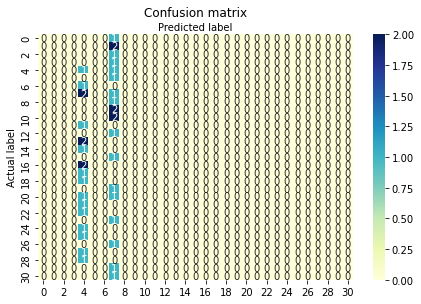

In [36]:
%matplotlib inline

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
seaborn.heatmap(pd.DataFrame(confusion_matrix(y,pred)), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [37]:
print(classification_report(y,pred))

              precision    recall  f1-score   support

          11       0.00      0.00      0.00         1
          12       0.00      0.00      0.00         2
          14       0.00      0.00      0.00         1
          15       0.00      0.00      0.00         1
          16       0.05      0.50      0.10         2
          17       0.00      0.00      0.00         1
          18       0.00      0.00      0.00         1
          19       0.05      0.33      0.08         3
          20       0.00      0.00      0.00         1
          21       0.00      0.00      0.00         2
          22       0.00      0.00      0.00         2
          23       0.00      0.00      0.00         1
          24       0.00      0.00      0.00         1
          25       0.00      0.00      0.00         2
          26       0.00      0.00      0.00         1
          27       0.00      0.00      0.00         1
          28       0.00      0.00      0.00         2
          29       0.00    

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
